**Jarrian Vince G. Gojar**\
Instructor I\
*College of Information and Communications Technology, Sorsogon State University, Philippines*

# Introduction

`Contour Detection` is a technique used in computer vision for detecting
the boundaries or outlines of objects in an image. It is a fundamental
step in many image processing tasks. These operations are are, namely,
computing bounding polygons, approximating shapes, and generally
calculating `regions of interest (ROI)`.

**Read More:**

- [OpenCV Contour Detection](https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html)
- [OpenCV Contour Features](https://docs.opencv.org/3.4/dd/d49/tutorial_py_contour_features.html)

# Setup

In [ ]:
%pip install opencv-python opencv-contrib-python numpy matplotlib

# Initial Setup

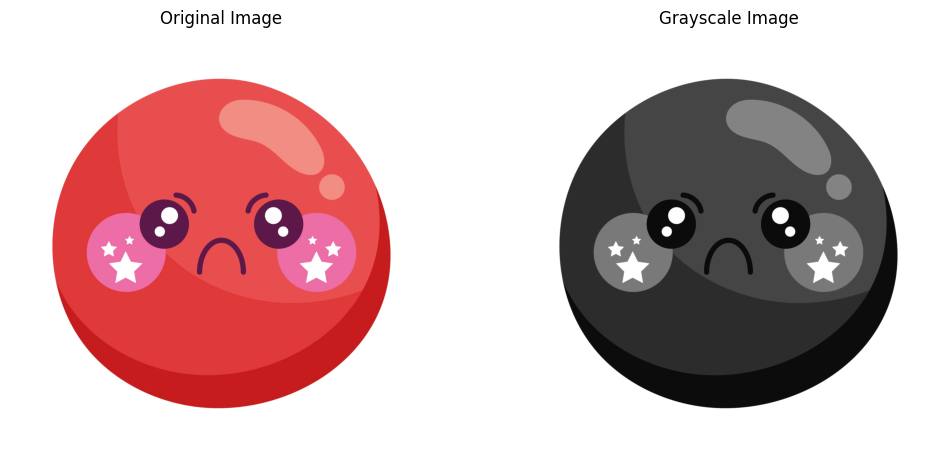

In [6]:
# Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Asset Root
asset_root = '../../assets/'

# Image Path
image_path = asset_root + '/images/angry_emoji.jpg'

# Read Image and convert to RGB
input_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

# Convert Image to Grayscale
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Display Both Image
plt.figure("Angry Emoji", figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.show()

# Bounding Box, Minimum Area Rectangle, and Minimum Enclosing Circle

Finding the bounding box, minimum area rectangle, and minimum enclosing
circle of a contour is a common task in computer vision. These operations
are used to approximate the shape of the object in the image.

`Contours` in OpenCV the `cv2.findContours()` function is used to find
the contours in an image. The function takes a binary image as input
and returns a list of contours.

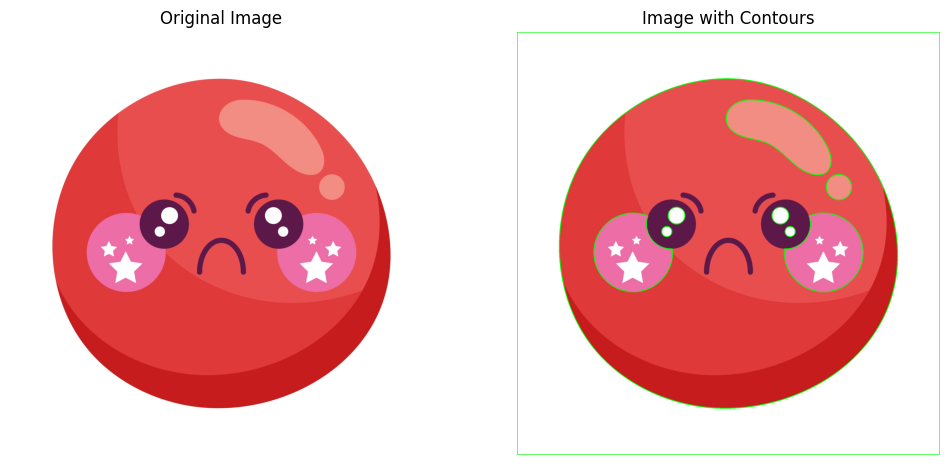

In [7]:
# Create Threshold Image
def threshold_image(image, threshold=127, max_value=255, threshold_type=cv2.THRESH_BINARY):
    # Convert Image to Grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Threshold
    ret, thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

    return thresh

ret, thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Find Contours
def find_contours(image):
    contours, hierarchy = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    return contours, hierarchy

contours, hierarchy = find_contours(thresh)

# Draw Contours
def draw_contours(image, contours, index=-1, color=(0, 255, 0), thickness=3):
    contour_image = cv2.drawContours(image.copy(), contours, index, color, thickness)

    return contour_image

contour_image = draw_contours(input_image, contours, index=-1, color=(0, 255, 0), thickness=3)

# Display Image with Contours
plt.figure("Contours", figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(contour_image)
plt.title("Image with Contours")
plt.axis('off')

plt.show()

In OpenCV, the `cv2.boundingRect()`, `cv2.minAreaRect()`, and
`cv2.minEnclosingCircle()` functions are used to find the bounding box,
minimum area rectangle, and minimum enclosing circle of a contour,
respectively.

The `cv2.boundingRect()` function returns the bounding box of a contour.
The bounding box is a rectangle that completely encloses the contour.
The function returns the `(x, y, w, h)` coordinates of the bounding box,
where `(x, y)` is the top-left corner of the rectangle, and `(w, h)` are
the width and height of the rectangle.

The `cv2.minAreaRect()` function returns the minimum area rectangle that
encloses the contour. The minimum area rectangle is the smallest rectangle
that can be rotated to completely enclose the contour. The function returns
a `((x, y), (w, h), angle)` tuple, where `(x, y)` is the center of the
rectangle, `(w, h)` are the width and height of the rectangle, and `angle`
is the angle of rotation of the rectangle.

The `cv2.minEnclosingCircle()` function returns the minimum enclosing
circle of a contour. The minimum enclosing circle is the smallest circle
that can be drawn to completely enclose the contour. The function returns
a `(center, radius)` tuple, where `center` is the center of the circle,
and `radius` is the radius of the circle.

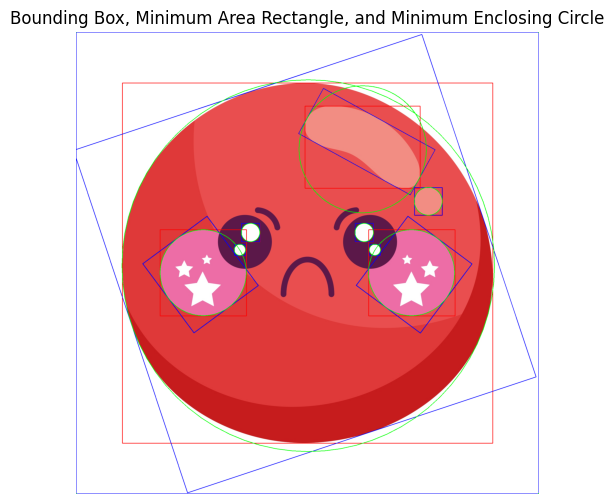

In [8]:
# Create a Copy of the Image
input_image_contours = input_image.copy()

# For Each Contour find Bounding Box, Minimum Area Rectangle, and Minimum Enclosing Circle
def draw_contour_features(image, contours):
    for contour in contours:
        # Bounding Box
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(input_image_contours, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # Minimum Area Rectangle
        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box = np.intp(box)
        cv2.drawContours(input_image_contours, [box], 0, (0, 0, 255), 2)

        # Minimum Enclosing Circle
        (x, y), radius = cv2.minEnclosingCircle(contour)
        center = (int(x), int(y))
        radius = int(radius)
        cv2.circle(input_image_contours, center, radius, (0, 255, 0), 2)

    return image

input_image_contours = draw_contour_features(input_image_contours, contours)
    
# Display Image with Bounding Box, Minimum Area Rectangle, and Minimum Enclosing Circle
plt.figure("Bounding Box, Minimum Area Rectangle, and Minimum Enclosing Circle", figsize=(12, 6))

plt.imshow(input_image_contours)
plt.title("Bounding Box, Minimum Area Rectangle, and Minimum Enclosing Circle")
plt.axis('off')

plt.show()

In this example, we found the `bounding box`, `minimum area rectangle`, and
`minimum enclosing circle` of the contours in the image. The `bounding box`
is the rectangle that completely encloses the contour. The `minimum area
rectangle` is the smallest rectangle that can be rotated to completely
enclose the contour. The `minimum enclosing circle` is the smallest circle
that can be drawn to completely enclose the contour.

**Read More:**

- [OpenCV Contours](https://docs.opencv.org/4.x/d4/d73/tutorial_py_contours_begin.html)
- [OpenCV Contour Features](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html)
- [OpenCV Contour Hierarchy](https://docs.opencv.org/4.x/d9/d8b/tutorial_py_contours_hierarchy.html)
- [OpenCV Contour Approximation](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#ga4303f45752694956374734a03c54d5ff)
- [OpenCV Contour Moments](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#ga556a180f43b33f4f371d1e3e2ba1bfbf)
- [OpenCV Contour Convex Hull](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#ga014b28e56cb8854c0de4a211cb2be656)
- [OpenCV Contour Bounding Box](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#ga103fcbda2f540f3ef1c042d6a9b35ac7)
- [OpenCV Contour Minimum Area Rectangle](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#ga3d476a3417130ae5154aea421ca7ead9)
- [OpenCV Contour Minimum Enclosing Circle](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#ga8ce13c24081bbc7151e9326f412190f1)

# Convex Contours and the Douglas-Peucker Algorithm

In computer vision, the `convex hull` of a set of points is the smallest
convex polygon that encloses all the points. The `convex hull` is a common
operation in computer vision and is used to approximate the shape of an
object in an image. A `convex shape` is a shape that has no concave corners.

The `cv2.convexHull()` function is used to find the convex hull of a set
of points. The function takes a list of points as input and returns the
convex hull of the points.

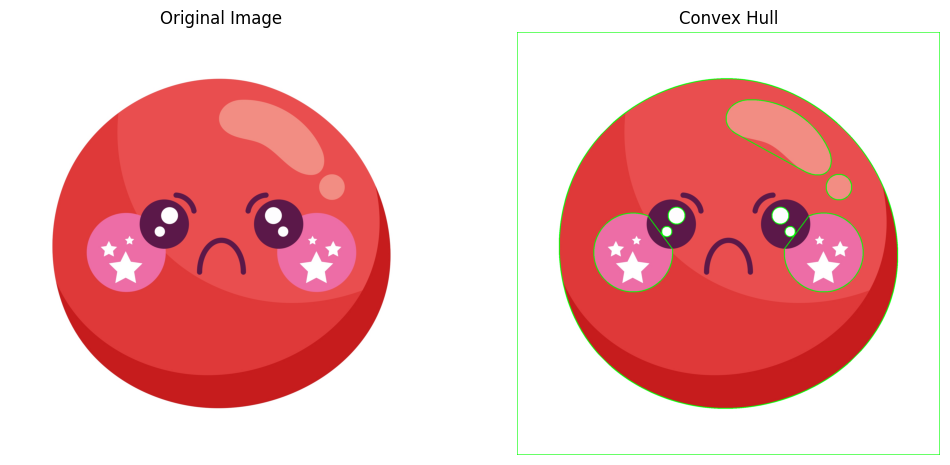

In [9]:
# Find Convex Hull
def find_convex_hull(contour):
    hull = cv2.convexHull(contour)

    return hull

# Draw Convex Hull
def draw_convex_hull(image, hull, color=(0, 255, 0), thickness=3):
    convex_hull_image = cv2.drawContours(image.copy(), [hull], -1, color, thickness)

    return convex_hull_image

# Create a Copy of the Image
input_image_convex_hull = input_image.copy()

# For Each Contour find Convex Hull
def draw_contour_convex_hull(image, contours):
    for contour in contours:
        hull = find_convex_hull(contour)
        image = draw_convex_hull(image, hull, color=(0, 255, 0), thickness=3)

    return image

input_image_convex_hull = draw_contour_convex_hull(input_image_convex_hull, contours)

# Display Image with Convex Hull
plt.figure("Convex Hull", figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(input_image_convex_hull)
plt.title("Convex Hull")
plt.axis('off')

plt.show()

Putting it all together, we found the `convex hull` of the contours in the
image. The `convex hull` is the smallest convex polygon that encloses all
the points of the contour. The `convex hull` is a common operation in computer
vision and is used to approximate the shape of an object in an image.

After this, we will see how to simplify a contour using the `Douglas-Peucker`
algorithm. The `Douglas-Peucker` algorithm is an algorithm used to simplify
a polygon by reducing the number of points in the polygon while preserving
the shape of the polygon. The algorithm works by recursively dividing the
polygon into smaller segments and removing points that are not necessary
to preserve the shape of the polygon.

The `cv2.approxPolyDP()` function is used to simplify a contour using the
`Douglas-Peucker` algorithm. The function takes a contour and an epsilon
parameter as input and returns the simplified contour.

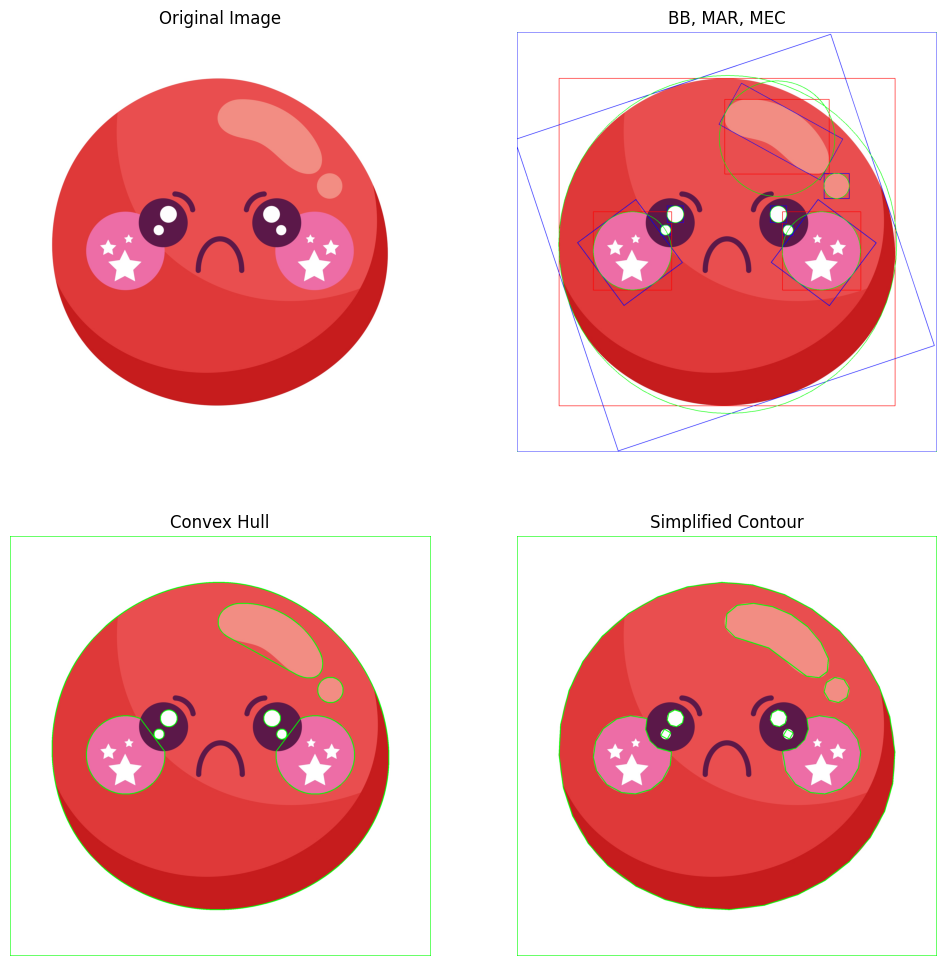

In [10]:
# Simplify Contour using Douglas-Peucker Algorithm
def simplify_contour(contour, epsilon=10, closed=True):
    simplified_contour = cv2.approxPolyDP(contour, epsilon, closed)

    return simplified_contour

# Draw Simplified Contour
def draw_simplified_contour(image, contour, color=(0, 255, 0), thickness=3):
    simplified_contour_image = cv2.drawContours(image.copy(), [contour], -1, color, thickness)

    return simplified_contour_image

# Create a Copy of the Image
input_image_simplified_contour = input_image.copy()

# For Each Contour find Simplified Contour
def draw_contour_simplified_contour(image, contours):
    for contour in contours:
        simplified_contour = simplify_contour(contour, epsilon=10, closed=True)
        image = draw_simplified_contour(image, simplified_contour, color=(0, 255, 0), thickness=3)

    return image

input_image_simplified_contour = draw_contour_simplified_contour(input_image_simplified_contour, contours)

# Display Image with Simplified Contour
plt.figure("Simplified Contour", figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.imshow(input_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(input_image_contours)
plt.title("BB, MAR, MEC")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(input_image_convex_hull)
plt.title("Convex Hull")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(input_image_simplified_contour)
plt.title("Simplified Contour")
plt.axis('off')

plt.show()

**Read More:**

- [OpenCV Contours](https://docs.opencv.org/4.x/d4/d73/tutorial_py_contours_begin.html)
- [OpenCV Drawing Contours](https://docs.opencv.org/4.x/d4/d73/tutorial_py_contours_begin.html)
- [OpenCV Bounding Box](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#ga103fcbda2f540f3ef1c042d6a9b35ac7)
- [OpenCV Minimum Area Rectangle](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#ga3d476a3417130ae5154aea421ca7ead9)
- [OpenCV Minimum Enclosing Circle](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#ga8ce13c24081bbc7151e9326f412190f1)
- [OpenCV Convex Hull](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#ga014b28e56cb8854c0de4a211cb2be656)
- [OpenCV Douglas-Peucker Algorithm](https://docs.opencv.org/4.x/dd/d49/tutorial_py_contour_features.html)

# Summary

- `Contours` are the boundaries of objects in an image.
- `Contours` are useful for shape analysis, object detection, and object recognition.
- `Contour Detection` is the process of finding the contours in an image.
- `Contour Features` such as `Bounding Box`, `Minimum Area Rectangle`, and `Minimum Enclosing Circle` can be used to describe the shape of an object.
- `Bounding Box` is the rectangle that completely encloses the contour.
- `Minimum Area Rectangle` is the smallest rectangle that can be rotated to completely enclose the contour.
- `Minimum Enclosing Circle` is the smallest circle that can be drawn to completely enclose the contour.
- `Convex Hull` is the smallest convex polygon that encloses all the points of a contour.
- `Convex Hull` is useful for approximating the shape of an object in an image.
- `Douglas-Peucker Algorithm` is an algorithm used to simplify a polygon by reducing the number of points in the polygon while preserving the shape of the polygon.
- `Douglas-Peucker Algorithm` is useful for reducing the complexity of a contour while preserving the shape of the object.

# References

- Thomas G. (2022). Graphic Designing: A Step-by-Step Guide (Advanced). Larsen & Keller. ISBN: 978-1-64172-536-1
- Singh M. (2022). Computer Graphics and Multimedia. Random Publications LLP. ISBN: 978-93-93884-95-4
- Singh M. (2022). Computer Graphics Science. Random Publications LLP. ISBN: 978-93-93884-03-9
- Singh M. (2022). Computer Graphics Software. Random Publications LLP. ISBN: 9789393884114
- Tyagi, V. (2021). Understanding Digital Image Processing. CRC Press.
- Ikeuchi, K. (Ed.). (2021). Computer Vision: A Reference Guide (2nd ed.). Springer.
- Bhuyan, M. K. (2020). Computer Vision and Image Processing. CRC Press.
- Howse, J., & Minichino, J. (2020). Learning OpenCV 4 Computer Vision with Python 3: Get to grips with tools, techniques, and algorithms for computer vision and machine learning. Packt Publishing Ltd.
- Kinser, J. M. (2019). Image Operators: Image Processing in Python. CRC Press.
